In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/MBTA_Model/MBTA_Bus_2024_Preprocessed.csv'
df = pd.read_csv(file_path, parse_dates=['service_date'])  # Add other date columns if needed

<ipython-input-2-8acdfc62669a>:5: DtypeWarning: Columns (1,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['service_date'])  # Add other date columns if needed


In [5]:
df.head(10)

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,...,scheduled_headway,headway,scheduled_time,actual_time,scheduled_minutes,actual_minutes,delay_minutes,delayed_flag,route_id_str,is_target
0,2024-09-01,01,Inbound,64240110.0,110,hhgat,1,Startpoint,Schedule,1900-01-01T11:05:00Z,...,NaN,NaN,11:05:00,11:05:21,665.0,665.350000,0.350000,False,01,False
1,2024-09-01,01,Inbound,64240110.0,67,maput,2,Midpoint,Schedule,1900-01-01T11:09:00Z,...,NaN,NaN,11:09:00,11:06:57,669.0,666.950000,-2.050000,False,01,False
2,2024-09-01,01,Inbound,64240110.0,72,cntsq,3,Midpoint,Schedule,1900-01-01T11:12:00Z,...,NaN,NaN,11:12:00,11:09:43,672.0,669.716667,-2.283333,False,01,False
3,2024-09-01,01,Inbound,64240110.0,75,mit,4,Midpoint,Schedule,1900-01-01T11:15:00Z,...,NaN,NaN,11:15:00,11:14:13,675.0,674.216667,-0.783333,False,01,False
4,2024-09-01,01,Inbound,64240110.0,79,hynes,5,Midpoint,Schedule,1900-01-01T11:19:00Z,...,NaN,NaN,11:19:00,11:17:53,679.0,677.883333,-1.116667,False,01,False
5,2024-09-01,01,Inbound,64240110.0,187,masta,6,Midpoint,Schedule,1900-01-01T11:21:00Z,...,NaN,NaN,11:21:00,11:22:56,681.0,682.933333,1.933333,False,01,False
6,2024-09-01,01,Inbound,64240110.0,59,Wasma,7,Midpoint,Schedule,1900-01-01T11:25:00Z,...,NaN,NaN,11:25:00,11:27:15,685.0,687.250000,2.250000,False,01,False
7,2024-09-01,01,Inbound,64239964.0,110,hhgat,1,Startpoint,Headway,1900-01-01T11:25:00Z,...,1200.0,1177.0,11:25:00,11:24:58,685.0,684.966667,-0.033333,False,01,False
8,2024-09-01,01,Inbound,64239964.0,67,maput,2,Midpoint,Headway,1900-01-01T11:29:00Z,...,1200.0,1205.0,11:29:00,11:27:02,689.0,687.033333,-1.966667,False,01,False
9,2024-09-01,01,Inbound,64240110.0,62,Melwa,8,Midpoint,Schedule,1900-01-01T11:29:00Z,...,NaN,NaN,11:29:00,11:31:34,689.0,691.566667,2.566667,False,01,False


In [6]:
# Column names, data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27049203 entries, 0 to 27049202
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   service_date       datetime64[ns]
 1   route_id           object        
 2   direction_id       object        
 3   half_trip_id       float64       
 4   stop_id            int64         
 5   time_point_id      object        
 6   time_point_order   int64         
 7   point_type         object        
 8   standard_type      object        
 9   scheduled          object        
 10  actual             object        
 11  scheduled_headway  float64       
 12  headway            float64       
 13  scheduled_time     object        
 14  actual_time        object        
 15  scheduled_minutes  float64       
 16  actual_minutes     float64       
 17  delay_minutes      float64       
 18  delayed_flag       bool          
 19  route_id_str       object        
 20  is_target          boo

In [7]:
# Stats for numeric and non-numeric columns
df.describe(include='all')

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,...,scheduled_headway,headway,scheduled_time,actual_time,scheduled_minutes,actual_minutes,delay_minutes,delayed_flag,route_id_str,is_target
count,27049203,27049203,27049203,2.704863e+07,2.704920e+07,27049203,2.704920e+07,27049203,27049203,27049203,...,1.278086e+07,1.053055e+07,27049203,24999357,2.704920e+07,2.499936e+07,2.499936e+07,27049203,27049203,27049203
unique,NaN,219,2,NaN,NaN,536,NaN,3,2,1638,...,NaN,NaN,1440,86400,NaN,NaN,NaN,2,219,2
top,NaN,111,Inbound,NaN,NaN,nubn,NaN,Midpoint,Schedule,1900-01-01T16:00:00Z,...,NaN,NaN,16:00:00,12:00:12,NaN,NaN,NaN,False,111,False
freq,NaN,1051290,13673780,NaN,NaN,696286,NaN,19381416,14268345,33780,...,NaN,NaN,33780,514,NaN,NaN,NaN,18483937,1051290,21634154
mean,2024-07-02 03:55:34.817648128,NaN,NaN,6.092686e+07,1.397165e+04,NaN,4.382530e+00,NaN,NaN,NaN,...,7.532274e+02,7.567248e+02,NaN,NaN,8.206591e+02,8.201273e+02,-7.618020e-01,NaN,NaN,NaN
min,2024-01-01 00:00:00,NaN,NaN,1.196200e+04,2.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,...,6.000000e+01,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,-1.439000e+03,NaN,NaN,NaN
25%,2024-04-02 00:00:00,NaN,NaN,6.262220e+07,1.363000e+03,NaN,2.000000e+00,NaN,NaN,NaN,...,6.000000e+02,4.070000e+02,NaN,NaN,5.530000e+02,5.532000e+02,4.833333e-01,NaN,NaN,NaN
50%,2024-07-02 00:00:00,NaN,NaN,6.359318e+07,5.271000e+03,NaN,4.000000e+00,NaN,NaN,NaN,...,7.200000e+02,7.060000e+02,NaN,NaN,8.610000e+02,8.596667e+02,2.900000e+00,NaN,NaN,NaN
75%,2024-10-02 00:00:00,NaN,NaN,6.455782e+07,1.248000e+04,NaN,6.000000e+00,NaN,NaN,NaN,...,9.000000e+02,1.009000e+03,NaN,NaN,1.142000e+03,1.140617e+03,6.783333e+00,NaN,NaN,NaN
max,2024-12-31 00:00:00,NaN,NaN,6.554188e+07,8.833210e+05,NaN,2.800000e+01,NaN,NaN,NaN,...,5.760000e+04,5.722000e+04,NaN,NaN,1.439000e+03,1.439983e+03,1.439983e+03,NaN,NaN,NaN


In [8]:
# Missing values
df.isna().sum().sort_values(ascending=False)

,0
headway,16518649
scheduled_headway,14268345
actual,2049846
actual_time,2049846
actual_minutes,2049846
delay_minutes,2049846
half_trip_id,570
route_id,0
service_date,0
stop_id,0


In [9]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 27049203
Number of columns: 21


In [12]:
# Unique values for key columns

df['day_of_week'] = pd.to_datetime(df['service_date']).dt.dayofweek

print("Unique routes:", df['route_id_str'].nunique())
print("Unique dates:", df['service_date'].nunique())
print("Sample route IDs:", df['route_id_str'].unique()[:10])
print("Day of week range:", df['day_of_week'].unique())

Unique routes: 219
Unique dates: 366
Sample route IDs: ['01' '08' '09' '10' '100' '101' '104' '105' '106' '108']
Day of week range: [6 0 1 2 3 4 5]


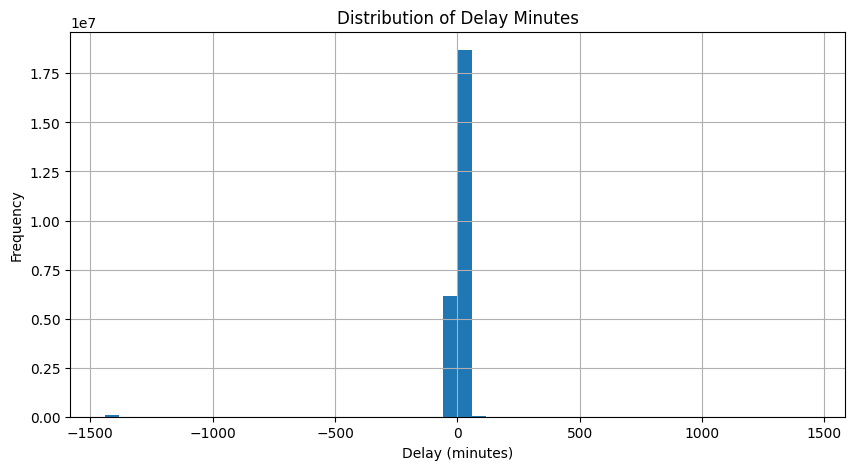

In [11]:
# Visualize delay distribution
import matplotlib.pyplot as plt

df['delay_minutes'].hist(bins=50, figsize=(10, 5))
plt.title("Distribution of Delay Minutes")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

